## Notebook de exploração dos dados de Crédito
O Score de Crédito está performando bem?

Existem variáveis que podem nos ajudar a melhorar o método de atribuição do Score?

Instruções de Execução:

1) Baixe este repositório ou clone ele utilizando git clone https://github.com/T1burski/asaas_credit_case.git

2) Crie um ambiente virtual com o comando (através do terminal): 

python -m venv asaas_credit_case

3) Defina (através do terminal) a versão do Python através do pyenv local, sendo que a versão do Python utilizada é a 3.9.10

4) Ative o ambiente virtual com o comando (através do terminal): 

asaas_credit_case\Scripts\activate

5) Instale os requirements através do comando (através do terminal): 

pip install -r requirements.txt

6) Então, é só trabalhar no notebook!

In [16]:
# importando libs e pacotes necessários

import sys
import os

sys.path.append(os.path.join(os.getcwd(), 'src'))

from useful_modules import analise_automatica
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from datetime import datetime
import shap

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [8]:
# importando os dados do csv disponibilizado
df_original = pd.read_csv(r'C:\Users\artur\Documents\asaas_credit_case\data\customer_database_case_study.csv')

Na célula abaixo, é possível verificar que no df original (df_original) algumas das colunas possume valores nulos.

Logo após, também imprimo na tela as 20 primeiras linhas do df para uma primeira visualização dos dados.

In [77]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        10000 non-null  int64  
 1   ApplicationDate   10000 non-null  object 
 2   CreditAmount      10000 non-null  int64  
 3   PersonType        10000 non-null  object 
 4   ApprovalStatus    10000 non-null  object 
 5   ProductType       10000 non-null  object 
 6   City              9486 non-null   object 
 7   PersonIncome      4688 non-null   float64
 8   PersonAge         4703 non-null   float64
 9   CompanyRevenue    4800 non-null   float64
 10  CompanyAge        4817 non-null   float64
 11  EconomicActivity  4796 non-null   object 
 12  CreditScore       10000 non-null  int64  
 13  DefaultStatus     4954 non-null   float64
dtypes: float64(5), int64(3), object(6)
memory usage: 1.1+ MB


In [78]:
df_original.head(20)

,CustomerID,ApplicationDate,CreditAmount,PersonType,ApprovalStatus,ProductType,City,PersonIncome,PersonAge,CompanyRevenue,CompanyAge,EconomicActivity,CreditScore,DefaultStatus
0,335244,2023-08-21,2346,PJ,DENIED,CartaoCredito,Night City,NaN,NaN,434979.0,1.0,Others,674,NaN
1,58370,2023-01-10,15051,PJ,APPROVED,CartaoCredito,Springfield,NaN,NaN,374600.0,9.0,Marketing,810,0.0
2,13113,2023-04-11,6584,PJ,APPROVED,CartaoCredito,NaN,NaN,NaN,216490.0,16.0,Marketing,566,0.0
3,388787,2023-03-23,4565,PJ,DENIED,Emprestimo,Smallville,NaN,NaN,340132.0,14.0,HealthCare,390,NaN
4,144195,2023-09-26,848,PF,APPROVED,Emprestimo,Night City,27623.0,44.0,NaN,NaN,NaN,778,0.0
5,128394,2023-09-04,848,PJ,APPROVED,CartaoCredito,Night City,NaN,NaN,536672.0,39.0,Education,708,0.0
6,117027,2023-11-21,299,PF,DENIED,CartaoCredito,Smallville,6173.0,42.0,NaN,NaN,NaN,662,NaN
7,73159,2023-02-01,10056,PF,APPROVED,Emprestimo,Springfield,50427.0,36.0,NaN,NaN,NaN,582,0.0
8,386124,2023-06-03,4595,PJ,DENIED,Emprestimo,Smallville,NaN,NaN,NaN,7.0,HealthCare,560,NaN
9,53737,2023-01-11,6156,PF,APPROVED,Emprestimo,Springfield,20838.0,44.0,NaN,NaN,NaN,856,0.0


Como é possível ver acima, de fato temos diversas ocorrências de valores nulos. Abaixo, também verifico se existem linhas duplicadas - e não existem (soma = 0).

In [79]:
int(df_original.duplicated().sum())

0

Um dos questinamentos principais do desafio é se o Score atual de crédito está de fato julgando corretamente os clientes e suas solicitações em termos da possibilidade/tendência de ocorrer problemas de pagamento (default).

Em um momento inicial, então, é interesante verificar como o Score está se comportando hoje, ou seja, quais valores o Score está assumindo ao aprovar ou negar uma solicitação de crédito. Para tal, as duas células abaixo estudam estes valores de Score de acordo com o ApplicationStatus.

É possível, com a análise das células abaixo, verificar que de fato solicitações com valores baixos de Score estão sendo negadas (DENIED). Em média, solicitações aprovadas possume um Score de 702,28, enquanto solicitações negadas possuem um Score de 449,99. Agora, será que o Score atual está proporcionando aprovações saudáveis? Ou muitas aprovações estão posteriormente gerando defaults? 

In [187]:
score_analysis = df_original.groupby(df_original['ApprovalStatus']).agg(Max_Score=('CreditScore', np.max),
                                                                        Min_Score=('CreditScore', np.min),
                                                                        Mean_Score=('CreditScore', np.mean),
                                                                        Std_Score=('CreditScore', np.std),
                                                                        Median_Score=('CreditScore', np.median)).reset_index()

score_analysis

,ApprovalStatus,Max_Score,Min_Score,Mean_Score,Std_Score,Median_Score
0,APPROVED,900,500,702.278361,115.332059,703.5
1,DENIED,700,200,449.989893,145.515548,448.0


<Axes: xlabel='ApprovalStatus', ylabel='CreditScore'>

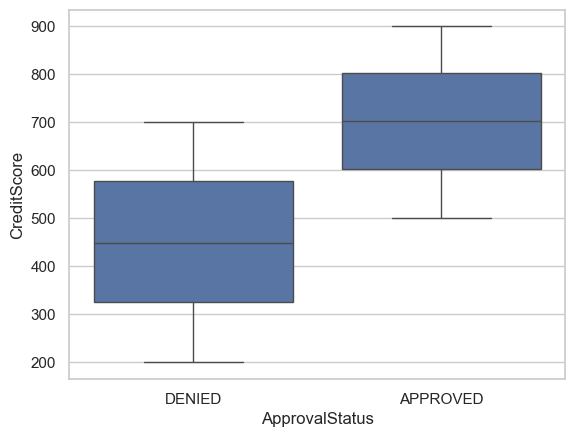

In [189]:
sns.boxplot(data=df_original, x='ApprovalStatus', y='CreditScore')

De forma a julgar o Score e as demais variáveis em função da ocorrência de default, é necessário que tenhamos o dado do fato. Ou seja, salvarei duas versões do df_original: uma com as linhas com a informação do default, e uma com as linhas sem a informação do default. 

In [9]:
df_nan_default = df_original.loc[df_original["DefaultStatus"].isnull()]
df = df_original.loc[~df_original["DefaultStatus"].isnull()]

Abaixo, agora, vamos verificar se temos de fato uma linha de histórico de solicitações para cada cliente ou se um cliente pode ter feito mais de uma solicitação.

De fato, existem clientes que fizeram mais de uma solicitação (ver diferença entre o # de linhas)

In [81]:
print(f"N de linhas totais: {len(df)}")
print(f"N de clientes distintos: {len(df['CustomerID'].unique().tolist())}")

N de linhas totais: 4954
N de clientes distintos: 4932


Entrando um pouco mais à fundo nisto, podemos verificar na célular abaixo que nenhum cliente fez mais de 2 solicitações.

In [66]:
df.groupby(df["CustomerID"]).agg(N_rows_cliente=("CustomerID", 'count')).reset_index().sort_values(by=["N_rows_cliente"], ascending=False).head(10)

,CustomerID,N_rows_cliente
1586,164723,2
2417,247580,2
824,85198,2
1400,145835,2
1429,148514,2
2120,216825,2
214,23864,2
431,47230,2
1234,126846,2
2389,244002,2


Lembrando que estamos com o dataframe, agora, de linhas que possuem a informação da ocorrência (1) ou não (0) do default. Abaixo, é impressa a distribuição das categorias 1 e 0 da coluna DefaultStatus.

Dos clientes que temos a informação do default, 81,5% não se tornou inadimplente, e 18,5% já se tornou. A ocorrência de quase 20% de inadimplência entre os clientes que tiveram créditos aprovados aponta que é coerente um estudo adicional de se o Score atual pode performar melhor.

In [72]:
print(df["DefaultStatus"].value_counts(normalize=True))
print(df["DefaultStatus"].value_counts())

DefaultStatus
0.0    0.814695
1.0    0.185305
Name: proportion, dtype: float64
DefaultStatus
0.0    4036
1.0     918
Name: count, dtype: int64


Uma análise detalhada das descrições das colunas da tabela original juntamente com uma análise preliminar das impressões acima, da tabela, permitem verificar que, dependendo do tipo de pessoa (PersonType), o preenchimento das colunas PersonIncome, CompanyRevenue, EconomicActivity, PersonAge e CompanyAge podem estar associados a valores nulos ou não. Caso a pessoa seja PF, PersonIncome e PersonAge estarão preenchidas, enquanto as demais nulas. Para pessoas PJ, o contrário. Assim, adotou-se a estratégia de criar uma coluna para "Age" (denominada IDAge) e uma coluna para "Income/Revenue" (denominada IDValue_BRL) de forma agrupada para facilitar as análises. Também, EconomicActivity e City tiveram suas linhas nulas substituídas por "NoActivity" e "NoCity", respectivamente.

Ainda, com o objetivo de proporcionar uma exploração de possibilidades de variáveis ainda mais além, foram criadas duas variáveis temporais: o mês da aplicação e a semana do mês da aplicação, de forma a tentarmos, posteriormente, detectar se estas informações temporais podem estar associadas a solicitações de clientes inadimplentes.

In [10]:
df['IDValue_BRL'] = np.where(df["PersonIncome"].isnull(), df["CompanyRevenue"], df["PersonIncome"])
df['IDAge'] = np.where(df["PersonAge"].isnull(), df["CompanyAge"], df["PersonAge"])
df["EconomicActivityNew"] = np.where(df["EconomicActivity"].isnull(), "NoActivity", df["EconomicActivity"])
df["CityNew"] = np.where(df["City"].isnull(), "NoCity", df["City"])
df["ApplicationDate"] = pd.to_datetime(df["ApplicationDate"])
df['MonthApplication'] = df["ApplicationDate"].dt.month
df['MonthApplication'] = df['MonthApplication'].astype(object)
df['WeekApplication'] = (df["ApplicationDate"].dt.day - 1) // 7 + 1
df['WeekApplication'] = df['WeekApplication'].astype(object)

Abaixo, também ocorre a criação de mais duas variáveis a serem analisadas a partir do df_original. A primeira (MultipleApplications) analisa se um cliente teve mais de uma solicitação de crédito, aprovada ou não, no último ano. A segunda (App_Hist) analisa se em alguma solicitação do último ano o cliente possuiu pelo menos uma solicitação negada (DENIED).

In [11]:
freq_ID = df_original.groupby(df_original["CustomerID"]).agg(N_rows_cliente=("CustomerID", 'count'), 
                                                             App_Hist=('ApprovalStatus', lambda x: '1' if 'DENIED' in x.values else '0')).reset_index()

freq_ID["MultipleApplications"] = np.where(freq_ID["N_rows_cliente"] > 1, '1', '0')

df = pd.merge(df, freq_ID[["CustomerID", "MultipleApplications", "App_Hist"]], on='CustomerID', how='left')


In [12]:
df["DefaultStatus"] = df["DefaultStatus"].astype(int)
df

,CustomerID,ApplicationDate,CreditAmount,PersonType,ApprovalStatus,ProductType,City,PersonIncome,PersonAge,CompanyRevenue,CompanyAge,EconomicActivity,CreditScore,DefaultStatus,IDValue_BRL,IDAge,EconomicActivityNew,CityNew,MonthApplication,WeekApplication,MultipleApplications,App_Hist
0,58370,2023-01-10,15051,PJ,APPROVED,CartaoCredito,Springfield,NaN,NaN,374600.0,9.0,Marketing,810,0,374600.0,9.0,Marketing,Springfield,1,2,0,0
1,13113,2023-04-11,6584,PJ,APPROVED,CartaoCredito,NaN,NaN,NaN,216490.0,16.0,Marketing,566,0,216490.0,16.0,Marketing,NoCity,4,2,0,0
2,144195,2023-09-26,848,PF,APPROVED,Emprestimo,Night City,27623.0,44.0,NaN,NaN,NaN,778,0,27623.0,44.0,NoActivity,Night City,9,4,0,0
3,128394,2023-09-04,848,PJ,APPROVED,CartaoCredito,Night City,NaN,NaN,536672.0,39.0,Education,708,0,536672.0,39.0,Education,Night City,9,1,0,0
4,73159,2023-02-01,10056,PF,APPROVED,Emprestimo,Springfield,50427.0,36.0,NaN,NaN,NaN,582,0,50427.0,36.0,NoActivity,Springfield,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4949,303003,2023-07-19,8539,PJ,APPROVED,Emprestimo,Night City,NaN,NaN,894111.0,27.0,Education,806,0,894111.0,27.0,Education,Night City,7,3,0,0
4950,234441,2023-09-25,665,PJ,APPROVED,Emprestimo,Night City,NaN,NaN,739019.0,7.0,Agriculture,810,0,739019.0,7.0,Agriculture,Night City,9,4,0,0
4951,107826,2023-08-30,11390,PF,APPROVED,CartaoCredito,NaN,23860.0,51.0,NaN,NaN,NaN,649,0,23860.0,51.0,NoActivity,NoCity,8,5,0,0
4952,357312,2023-11-16,14660,PF,APPROVED,CartaoCredito,Smallville,18669.0,58.0,NaN,NaN,NaN,681,0,18669.0,58.0,NoActivity,Smallville,11,3,0,0


## Análises de Correlação
Com os dados tratados e estruturados, podemos proceder para a análise de como as variáveis presentes na base de dados se relacionam, significativamente ou não, com o DefaultStatus dos respectivos clientes, assim como a análise de como está a distribuição do Score de Crédito de acordo com a tendência de inadimplência de cada cliente.

O procedimento de análise ocorre a partir da função "analise_automatica", que está presente em um módulo neste repositório na pasta src. Esta função separa o tipo de análise por tipo de variável da base. Se estamos comparando o DefaultStatus com uma variável categórica, é realizado um teste Qui^2 para verificar se há associação significativa entre estas variáveis categóricas com um nível de confiança de 95% (alfa = 0,05). Para estes estudos, estamos considerando que todas observações são independentes e levando em conta a ocorrência de frequências esperadas maiores ou iguais a 5 (se isso não ocorre, o teste não é realizado). Agora, se estamos comparando o DefaultStatus com uma variável numérica, dois testes são realizados para verificar se a média/distribuição das variáveis numéricas variam significativamente entre os grupos onde DefaultStatus = 0 e DefaultStatus = 1: teste-t (se a normalidade conforme scipy.normaltest for constatada para os dois grupos comparados) e o teste não-paramétrico de mann-whitney, todos com um nível de confiança de 95% (alfa = 0,05).

Com estas análises, desejamos verificar se alguma (ou algumas) das variáveis que constam na base de dados (tanto as originais quanto as criadas) podem significativamente identificar clientes com maiores tendências de inadimplência, podendo servir, se comprovado, como atributos em um modelo de crédito para associação de Score.

Foi tomada a decisão de realizar a análise da função separando também os dados por tipo de pessoa (PF e PJ). O fato de, como será visto mais à frente, o tipo de pessoa PF ter significativamente maiores frequências de clientes inadimplentes em comparação ao PJ, juntamente com o fato de que os valores de IDAge de PF são bastante maiores em relação ao PJ e de que os valores de IDVAlue_BRL de PF são bastante menores em relação ao PJ, demandam análises secundárias das variáveis quando separadas nestes grupos de forma a verificar se de fato as conclusões tiradas com a base PF+PJ se mantém significativas.

Nas três células abaixo, a função é aplicada três vezes: a primeira com a base total contendo tanto clientes PF quanto PJ, a segunda apenas com clientes PF e a última apenas com clientes PJ. A função gera, devido principalmente aos gráficos, relatórios bastante extensos.

Analisando o atributo: DefaultStatus

Análise do atributo categórico: PersonType
------------------------------------------------------------
Proporcão de DefaultStatus por PersonType:
DefaultStatus         0         1
PersonType                       
PF             0.731768  0.268232
PJ             0.894341  0.105659


<Figure size 2000x1000 with 0 Axes>

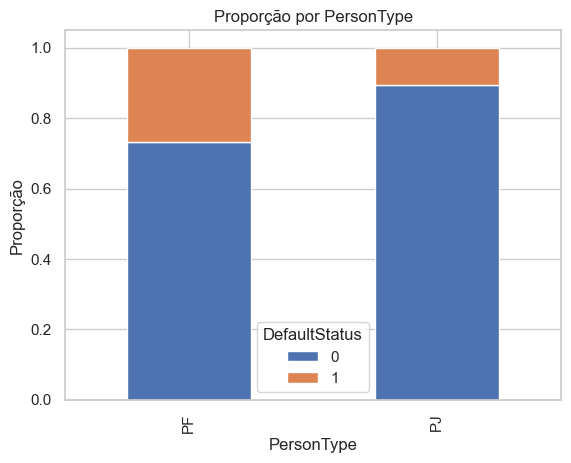

p-valor do teste Qui^2: 7.986858102224006e-49
Relação significativa encontrada entre PersonType e DefaultStatus (p < 0.05).

Análise do atributo categórico: ProductType
------------------------------------------------------------
Proporcão de DefaultStatus por ProductType:
DefaultStatus         0         1
ProductType                      
CartaoCredito  0.865254  0.134746
Emprestimo     0.763147  0.236853


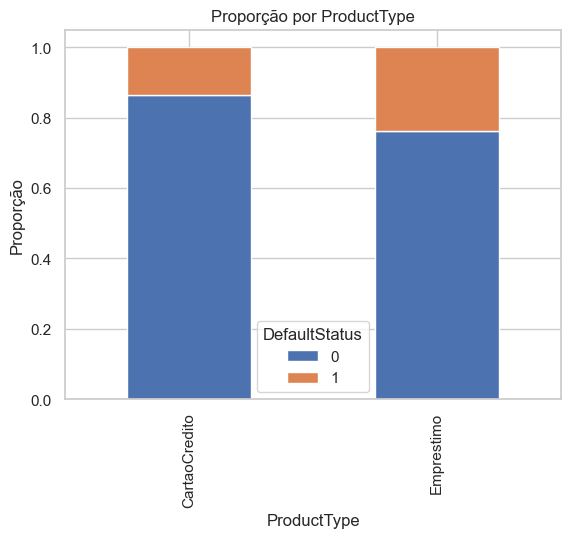

p-valor do teste Qui^2: 3.222337039669505e-20
Relação significativa encontrada entre ProductType e DefaultStatus (p < 0.05).

Análise do atributo categórico: EconomicActivityNew
------------------------------------------------------------
Proporcão de DefaultStatus por EconomicActivityNew:
DefaultStatus               0         1
EconomicActivityNew                    
Agriculture          0.880503  0.119497
Education            0.904459  0.095541
HealthCare           0.896480  0.103520
Marketing            0.896050  0.103950
NoActivity           0.741520  0.258480
Others               0.888889  0.111111


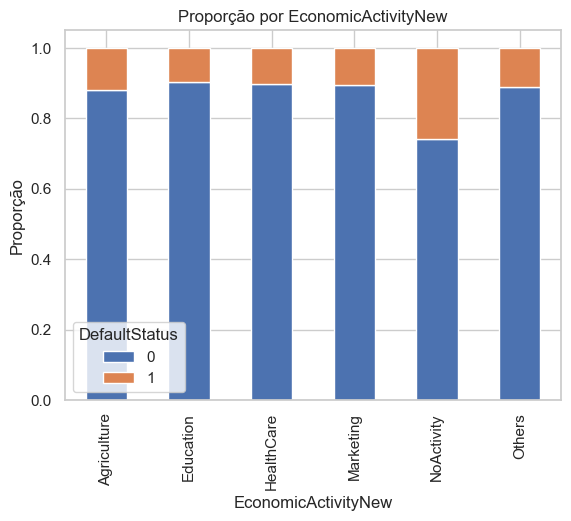

p-valor do teste Qui^2: 4.576511280126884e-39
Relação significativa encontrada entre EconomicActivityNew e DefaultStatus (p < 0.05).

Análise do atributo categórico: CityNew
------------------------------------------------------------
Proporcão de DefaultStatus por CityNew:
DefaultStatus         0         1
CityNew                          
Night City     0.745408  0.254592
NoCity         0.824701  0.175299
Smallville     0.857143  0.142857
Springfield    0.841051  0.158949


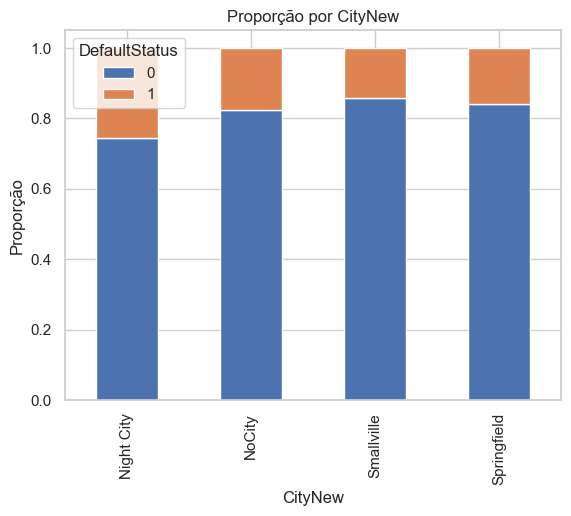

p-valor do teste Qui^2: 2.274497641581037e-16
Relação significativa encontrada entre CityNew e DefaultStatus (p < 0.05).

Análise do atributo categórico: MonthApplication
------------------------------------------------------------
Proporcão de DefaultStatus por MonthApplication:
DefaultStatus            0         1
MonthApplication                    
1                 0.783981  0.216019
2                 0.838164  0.161836
3                 0.839506  0.160494
4                 0.790588  0.209412
5                 0.817308  0.182692
6                 0.808901  0.191099
7                 0.804819  0.195181
8                 0.797753  0.202247
9                 0.827189  0.172811
10                0.843137  0.156863
11                0.809645  0.190355
12                0.816832  0.183168


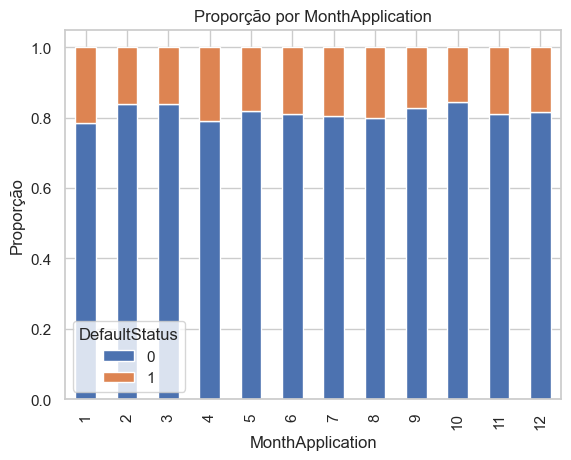

p-valor do teste Qui^2: 0.4181352025514728
Sem Relação significativa encontrada entre MonthApplication e DefaultStatus (p >= 0.05).

Análise do atributo categórico: WeekApplication
------------------------------------------------------------
Proporcão de DefaultStatus por WeekApplication:
DefaultStatus           0         1
WeekApplication                    
1                0.823268  0.176732
2                0.816901  0.183099
3                0.809028  0.190972
4                0.807420  0.192580
5                0.821078  0.178922


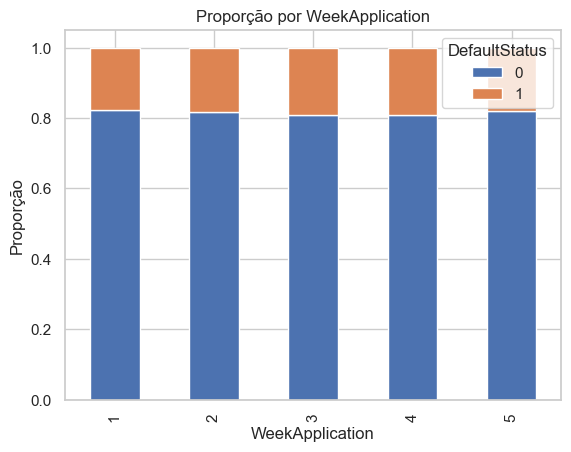

p-valor do teste Qui^2: 0.8550940089261768
Sem Relação significativa encontrada entre WeekApplication e DefaultStatus (p >= 0.05).

Análise do atributo categórico: MultipleApplications
------------------------------------------------------------
Proporcão de DefaultStatus por MultipleApplications:
DefaultStatus                0         1
MultipleApplications                    
0                     0.815211  0.184789
1                     0.786517  0.213483


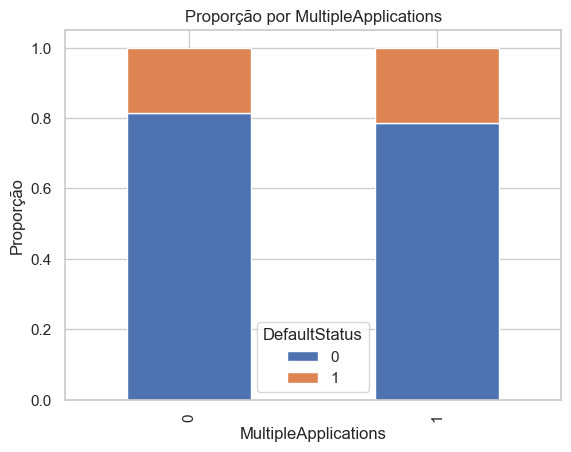

p-valor do teste Qui^2: 0.5804276173876752
Sem Relação significativa encontrada entre MultipleApplications e DefaultStatus (p >= 0.05).

Análise do atributo categórico: App_Hist
------------------------------------------------------------
Proporcão de DefaultStatus por App_Hist:
DefaultStatus         0         1
App_Hist                         
0              0.815645  0.184355
1              0.711111  0.288889


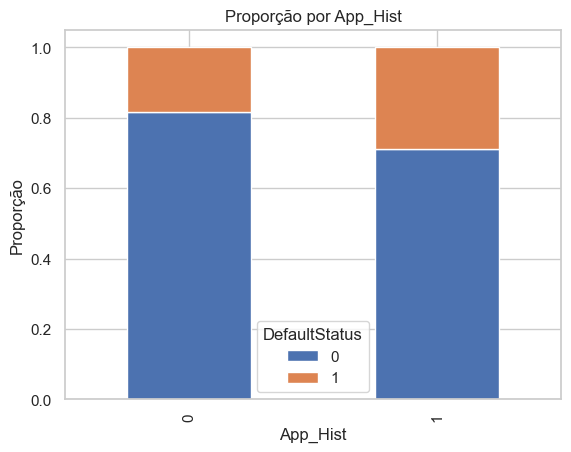

p-valor do teste Qui^2: 0.10874883058980005
Sem Relação significativa encontrada entre App_Hist e DefaultStatus (p >= 0.05).

Analisando o atributo numérico: CreditAmount
------------------------------------------------------------


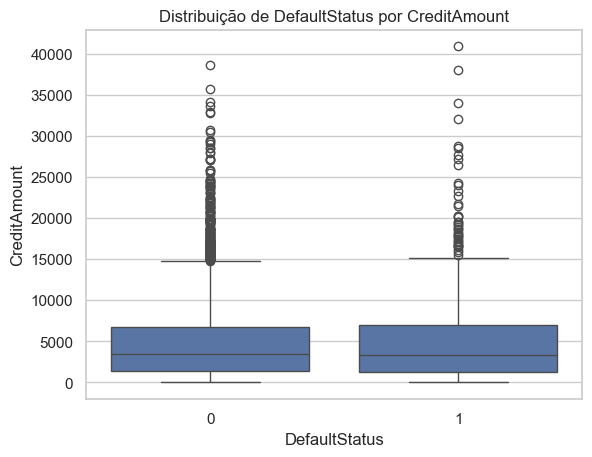

Média de CreditAmount Para DefaultStatus=0: 4935.280723488602
Média de CreditAmount Para DefaultStatus=1: 4984.655773420479
p-valor para o teste de normalidade quando DefaultStatus = 0: 0.0
p-valor para o teste de normalidade quando DefaultStatus = 1: 5.4049121545435954e-98
Teste t não aplicável (normalidade não pode ser assumida)
p-valor do teste Mann-Whitney: 0.42011143690248054
Diferença não significativa entre as distribuições entre grupos de DefaultStatus para CreditAmount (p >= 0.05).

Analisando o atributo numérico: CreditScore
------------------------------------------------------------


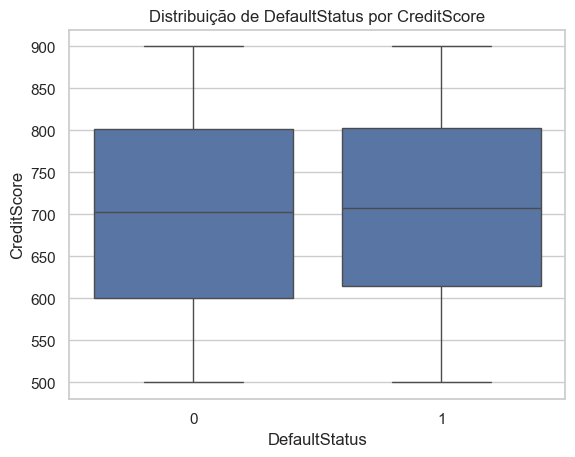

Média de CreditScore Para DefaultStatus=0: 701.1967294350842
Média de CreditScore Para DefaultStatus=1: 707.0337690631808
p-valor para o teste de normalidade quando DefaultStatus = 0: 0.0
p-valor para o teste de normalidade quando DefaultStatus = 1: 9.718857701423067e-97
Teste t não aplicável (normalidade não pode ser assumida)
p-valor do teste Mann-Whitney: 0.16789069836543968
Diferença não significativa entre as distribuições entre grupos de DefaultStatus para CreditScore (p >= 0.05).

Analisando o atributo numérico: IDValue_BRL
------------------------------------------------------------


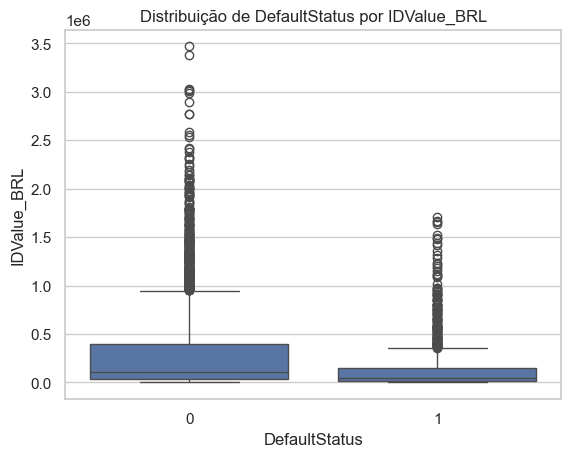

Média de IDValue_BRL Para DefaultStatus=0: 299648.56176547403
Média de IDValue_BRL Para DefaultStatus=1: 163734.60483870967
p-valor para o teste de normalidade quando DefaultStatus = 0: 0.0
p-valor para o teste de normalidade quando DefaultStatus = 1: 4.075250570862578e-115
Teste t não aplicável (normalidade não pode ser assumida)
p-valor do teste Mann-Whitney: 6.68019278395436e-29
Diferença entre as distribuições significativa entre grupos de DefaultStatus para IDValue_BRL (p < 0.05).

Analisando o atributo numérico: IDAge
------------------------------------------------------------


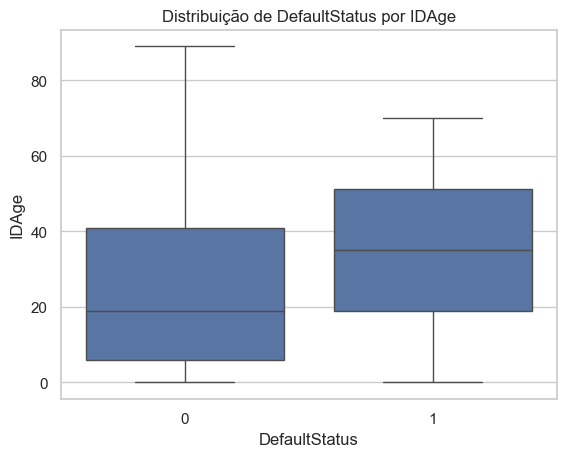

Média de IDAge Para DefaultStatus=0: 24.904823989569753
Média de IDAge Para DefaultStatus=1: 34.4041095890411
p-valor para o teste de normalidade quando DefaultStatus = 0: 1.2008918058424348e-146
p-valor para o teste de normalidade quando DefaultStatus = 1: 2.6900766405371598e-108
Teste t não aplicável (normalidade não pode ser assumida)
p-valor do teste Mann-Whitney: 1.0514021064848742e-32
Diferença entre as distribuições significativa entre grupos de DefaultStatus para IDAge (p < 0.05).

Analisando o atributo numérico: DefaultStatus
------------------------------------------------------------


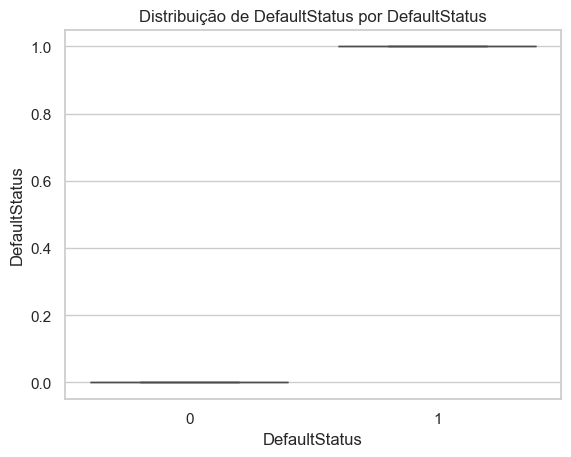

Média de DefaultStatus Para DefaultStatus=0: 0.0
Média de DefaultStatus Para DefaultStatus=1: 1.0
p-valor para o teste de normalidade quando DefaultStatus = 0: nan
p-valor para o teste de normalidade quando DefaultStatus = 1: nan
Teste t não aplicável (normalidade não pode ser assumida)
p-valor do teste Mann-Whitney: 0.0
Diferença entre as distribuições significativa entre grupos de DefaultStatus para DefaultStatus (p < 0.05).

Matriz de correlação entre as variáveis numéricas (considerando coeficiente de spearman):
------------------------------------------------------------


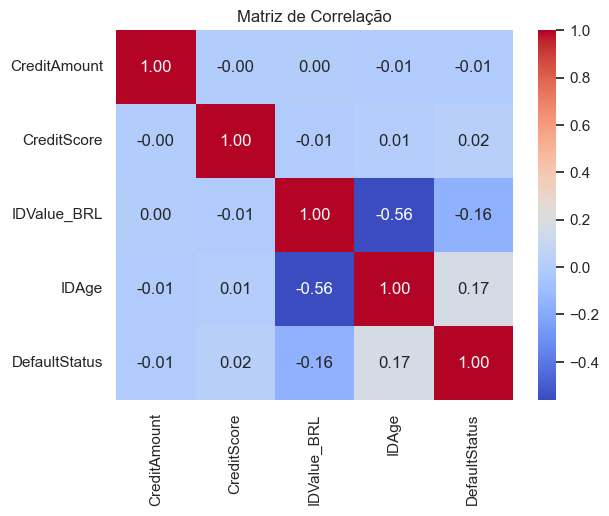

In [196]:
# Análise de Default sem separar por PF e PJ
analise_automatica(df[['CreditAmount', 'PersonType', 'ProductType', 'EconomicActivityNew', 'CreditScore', 'IDValue_BRL', 'IDAge', 'CityNew', 'MonthApplication', 'WeekApplication', 'MultipleApplications', 'App_Hist', 'DefaultStatus']])

Analisando o atributo: DefaultStatus

Análise do atributo categórico: PersonType
------------------------------------------------------------
Proporcão de DefaultStatus por PersonType:
DefaultStatus         0         1
PersonType                       
PF             0.731768  0.268232


<Figure size 2000x1000 with 0 Axes>

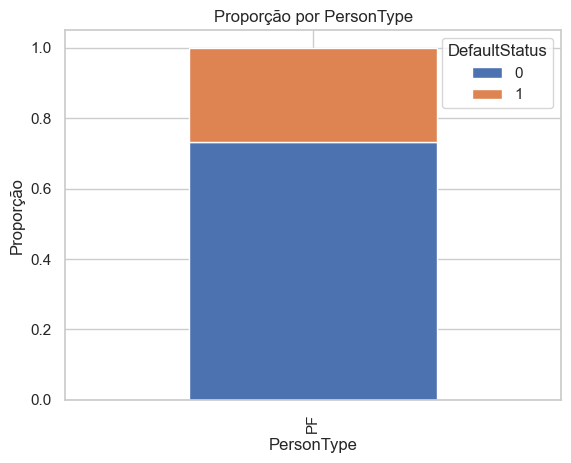

p-valor do teste Qui^2: 1.0
Sem Relação significativa encontrada entre PersonType e DefaultStatus (p >= 0.05).

Análise do atributo categórico: ProductType
------------------------------------------------------------
Proporcão de DefaultStatus por ProductType:
DefaultStatus         0         1
ProductType                      
CartaoCredito  0.781937  0.218063
Emprestimo     0.680301  0.319699


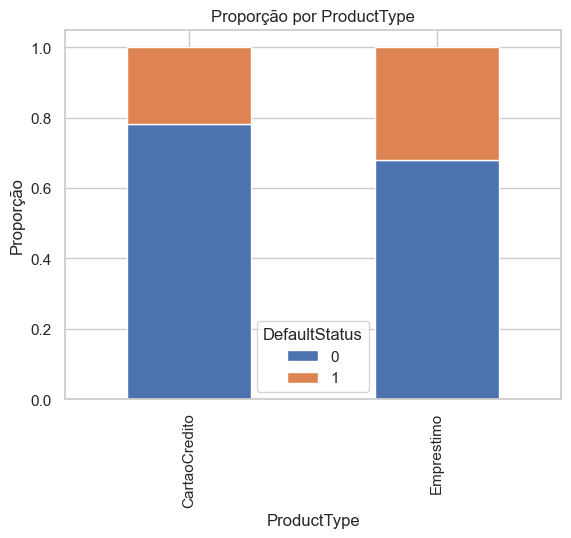

p-valor do teste Qui^2: 2.0882721620501906e-08
Relação significativa encontrada entre ProductType e DefaultStatus (p < 0.05).

Análise do atributo categórico: EconomicActivityNew
------------------------------------------------------------
Proporcão de DefaultStatus por EconomicActivityNew:
DefaultStatus               0         1
EconomicActivityNew                    
NoActivity           0.731768  0.268232


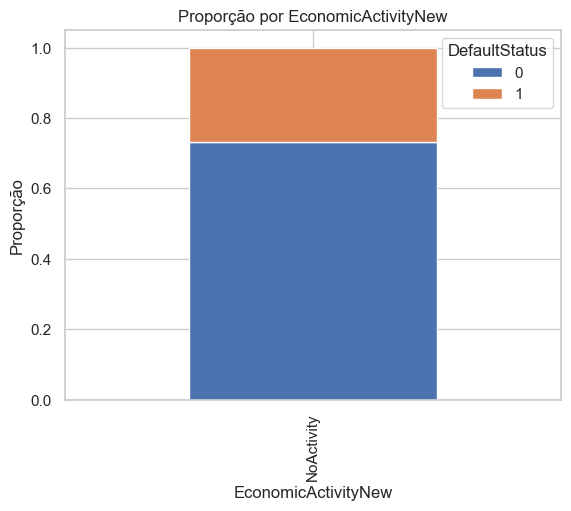

p-valor do teste Qui^2: 1.0
Sem Relação significativa encontrada entre EconomicActivityNew e DefaultStatus (p >= 0.05).

Análise do atributo categórico: CityNew
------------------------------------------------------------
Proporcão de DefaultStatus por CityNew:
DefaultStatus         0         1
CityNew                          
Night City     0.679537  0.320463
NoCity         0.748092  0.251908
Smallville     0.756835  0.243165
Springfield    0.757282  0.242718


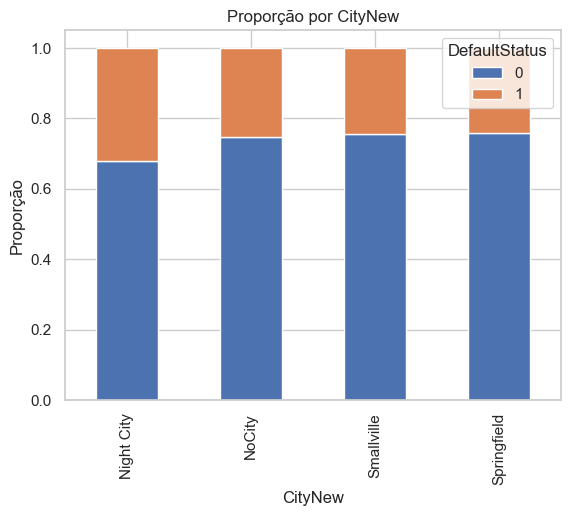

p-valor do teste Qui^2: 0.0011695061039370895
Relação significativa encontrada entre CityNew e DefaultStatus (p < 0.05).

Análise do atributo categórico: MonthApplication
------------------------------------------------------------
Proporcão de DefaultStatus por MonthApplication:
DefaultStatus            0         1
MonthApplication                    
1                 0.694836  0.305164
2                 0.760417  0.239583
3                 0.764706  0.235294
4                 0.666667  0.333333
5                 0.747619  0.252381
6                 0.732955  0.267045
7                 0.715640  0.284360
8                 0.718894  0.281106
9                 0.784689  0.215311
10                0.772021  0.227979
11                0.720207  0.279793
12                0.708543  0.291457


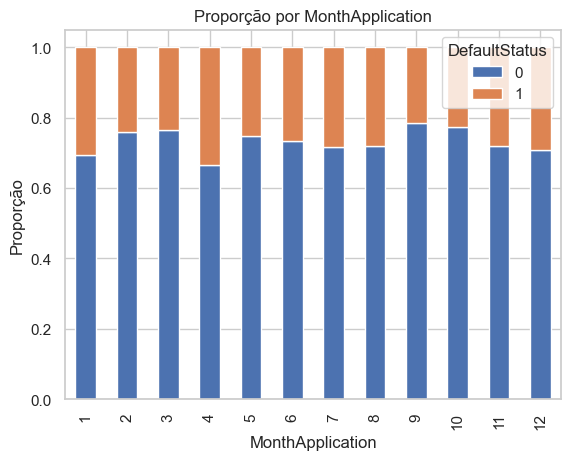

p-valor do teste Qui^2: 0.2368149293578116
Sem Relação significativa encontrada entre MonthApplication e DefaultStatus (p >= 0.05).

Análise do atributo categórico: WeekApplication
------------------------------------------------------------
Proporcão de DefaultStatus por WeekApplication:
DefaultStatus           0         1
WeekApplication                    
1                0.758427  0.241573
2                0.740143  0.259857
3                0.723958  0.276042
4                0.707665  0.292335
5                0.727273  0.272727


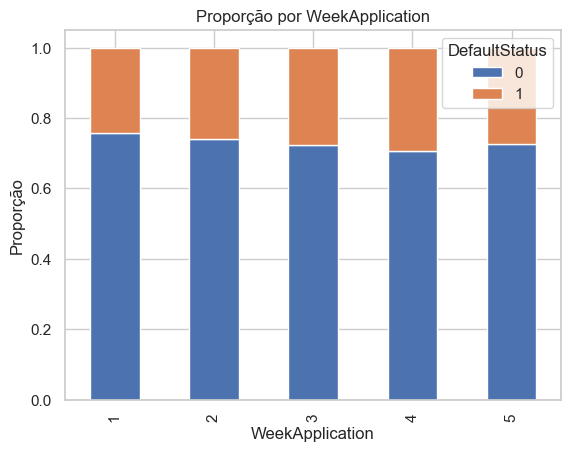

p-valor do teste Qui^2: 0.40699175540762267
Sem Relação significativa encontrada entre WeekApplication e DefaultStatus (p >= 0.05).

Análise do atributo categórico: MultipleApplications
------------------------------------------------------------
Proporcão de DefaultStatus por MultipleApplications:
DefaultStatus                0         1
MultipleApplications                    
0                     0.733081  0.266919
1                     0.666667  0.333333


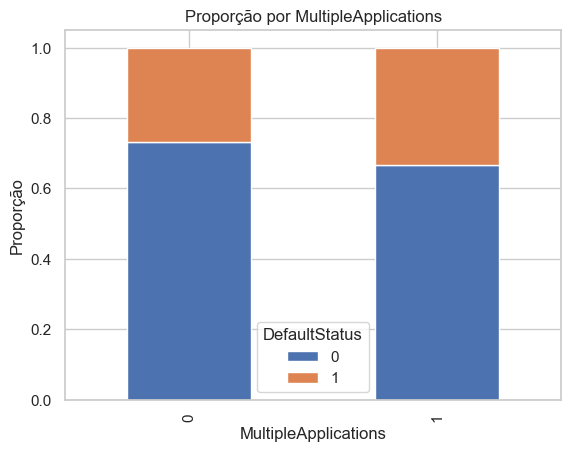

p-valor do teste Qui^2: 0.38773558547803366
Sem Relação significativa encontrada entre MultipleApplications e DefaultStatus (p >= 0.05).

Análise do atributo categórico: App_Hist
------------------------------------------------------------
Proporcão de DefaultStatus por App_Hist:
DefaultStatus         0         1
App_Hist                         
0              0.733333  0.266667
1              0.592593  0.407407


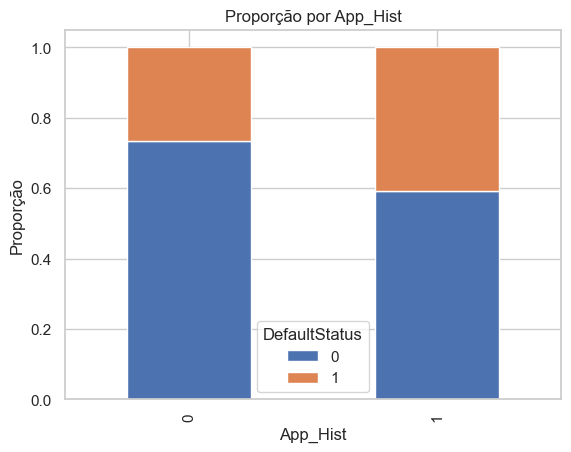

p-valor do teste Qui^2: 0.15472211163992544
Sem Relação significativa encontrada entre App_Hist e DefaultStatus (p >= 0.05).

Analisando o atributo numérico: CreditAmount
------------------------------------------------------------


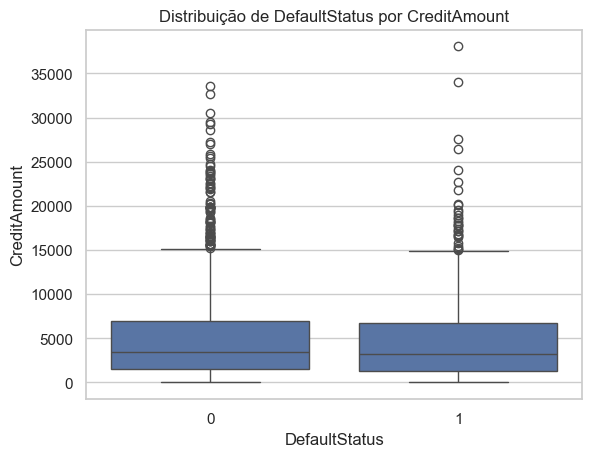

Média de CreditAmount Para DefaultStatus=0: 4972.596283783784
Média de CreditAmount Para DefaultStatus=1: 4759.989247311828
p-valor para o teste de normalidade quando DefaultStatus = 0: 9.260878028536319e-149
p-valor para o teste de normalidade quando DefaultStatus = 1: 4.192780044517662e-67
Teste t não aplicável (normalidade não pode ser assumida)
p-valor do teste Mann-Whitney: 0.16585041388022037
Diferença não significativa entre as distribuições entre grupos de DefaultStatus para CreditAmount (p >= 0.05).

Analisando o atributo numérico: CreditScore
------------------------------------------------------------


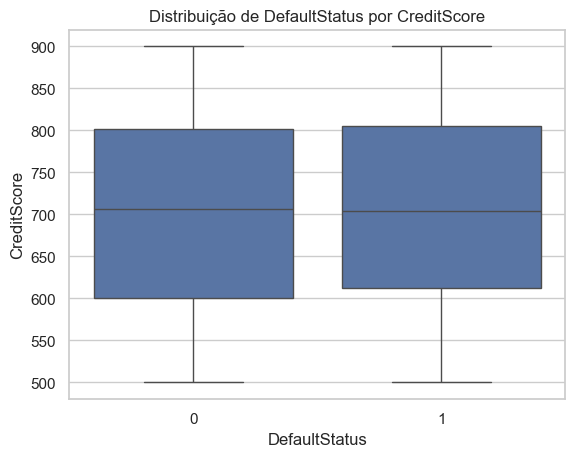

Média de CreditScore Para DefaultStatus=0: 702.4211711711712
Média de CreditScore Para DefaultStatus=1: 705.9723502304147
p-valor para o teste de normalidade quando DefaultStatus = 0: 0.0
p-valor para o teste de normalidade quando DefaultStatus = 1: 5.165162493723528e-78
Teste t não aplicável (normalidade não pode ser assumida)
p-valor do teste Mann-Whitney: 0.5141778507903484
Diferença não significativa entre as distribuições entre grupos de DefaultStatus para CreditScore (p >= 0.05).

Analisando o atributo numérico: IDValue_BRL
------------------------------------------------------------


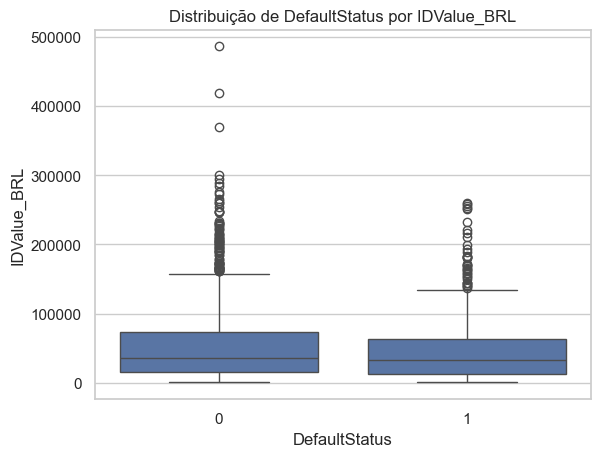

Média de IDValue_BRL Para DefaultStatus=0: 52825.25634967513
Média de IDValue_BRL Para DefaultStatus=1: 46480.719412724306
p-valor para o teste de normalidade quando DefaultStatus = 0: 1.0769657434559065e-172
p-valor para o teste de normalidade quando DefaultStatus = 1: 4.9875647310301845e-52
Teste t não aplicável (normalidade não pode ser assumida)
p-valor do teste Mann-Whitney: 0.006347802566809391
Diferença entre as distribuições significativa entre grupos de DefaultStatus para IDValue_BRL (p < 0.05).

Analisando o atributo numérico: IDAge
------------------------------------------------------------


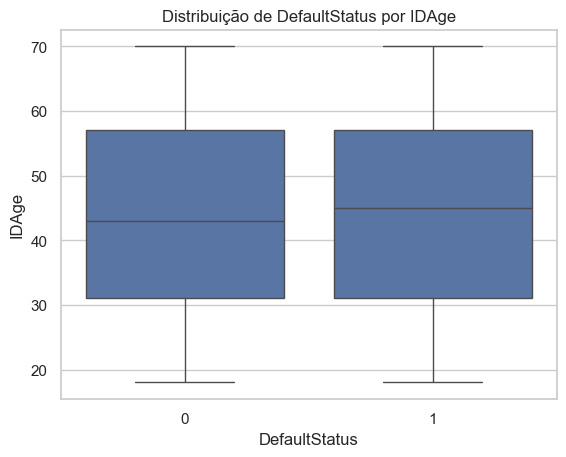

Média de IDAge Para DefaultStatus=0: 43.780660377358494
Média de IDAge Para DefaultStatus=1: 44.11022364217252
p-valor para o teste de normalidade quando DefaultStatus = 0: 0.0
p-valor para o teste de normalidade quando DefaultStatus = 1: 1.143373249988144e-98
Teste t não aplicável (normalidade não pode ser assumida)
p-valor do teste Mann-Whitney: 0.6422608788508413
Diferença não significativa entre as distribuições entre grupos de DefaultStatus para IDAge (p >= 0.05).

Analisando o atributo numérico: DefaultStatus
------------------------------------------------------------


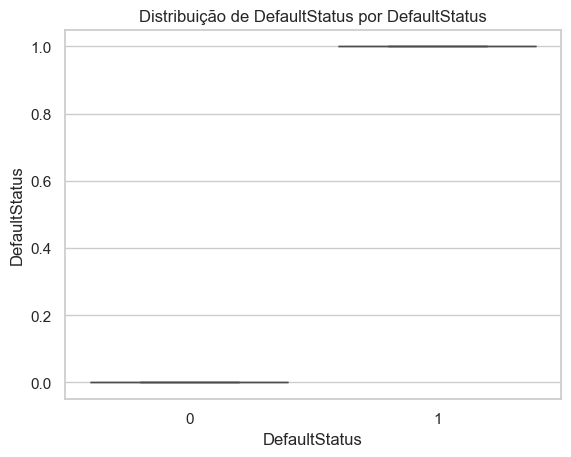

Média de DefaultStatus Para DefaultStatus=0: 0.0
Média de DefaultStatus Para DefaultStatus=1: 1.0
p-valor para o teste de normalidade quando DefaultStatus = 0: nan
p-valor para o teste de normalidade quando DefaultStatus = 1: nan
Teste t não aplicável (normalidade não pode ser assumida)
p-valor do teste Mann-Whitney: 0.0
Diferença entre as distribuições significativa entre grupos de DefaultStatus para DefaultStatus (p < 0.05).

Matriz de correlação entre as variáveis numéricas (considerando coeficiente de spearman):
------------------------------------------------------------


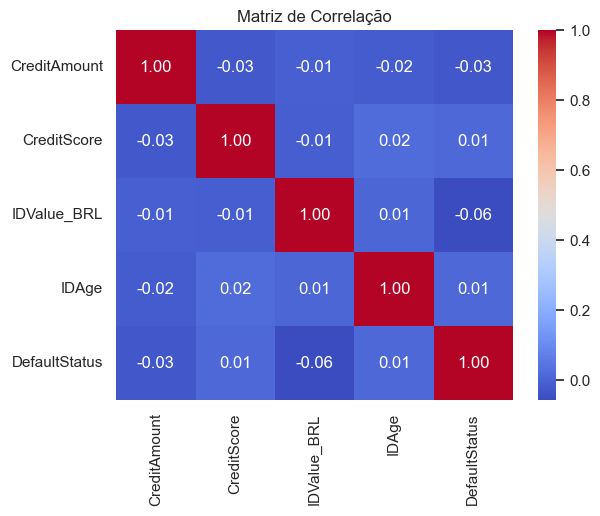

In [197]:
# Análise de Default para PF
analise_automatica(df.loc[df["PersonType"]=="PF"][['CreditAmount', 'PersonType', 'ProductType', 'EconomicActivityNew', 'CreditScore', 'IDValue_BRL', 'IDAge', 'CityNew', 'MonthApplication', 'WeekApplication', 'MultipleApplications', 'App_Hist', 'DefaultStatus']])

Analisando o atributo: DefaultStatus

Análise do atributo categórico: PersonType
------------------------------------------------------------
Proporcão de DefaultStatus por PersonType:
DefaultStatus         0         1
PersonType                       
PJ             0.894341  0.105659


<Figure size 2000x1000 with 0 Axes>

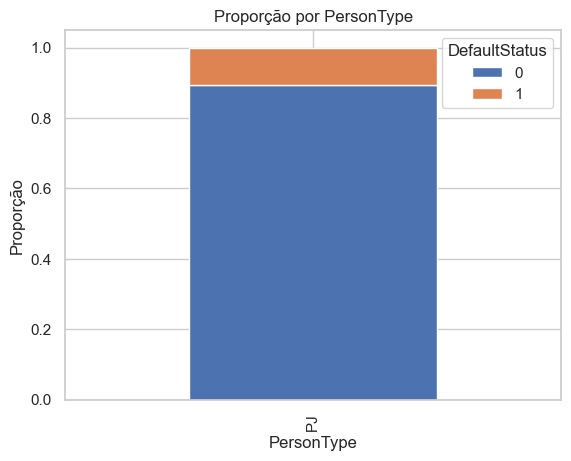

p-valor do teste Qui^2: 1.0
Sem Relação significativa encontrada entre PersonType e DefaultStatus (p >= 0.05).

Análise do atributo categórico: ProductType
------------------------------------------------------------
Proporcão de DefaultStatus por ProductType:
DefaultStatus         0         1
ProductType                      
CartaoCredito  0.945755  0.054245
Emprestimo     0.842231  0.157769


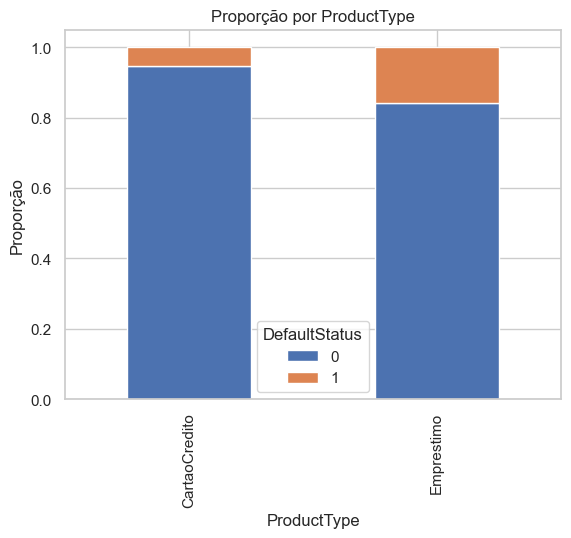

p-valor do teste Qui^2: 4.475614183144069e-17
Relação significativa encontrada entre ProductType e DefaultStatus (p < 0.05).

Análise do atributo categórico: EconomicActivityNew
------------------------------------------------------------
Proporcão de DefaultStatus por EconomicActivityNew:
DefaultStatus               0         1
EconomicActivityNew                    
Agriculture          0.880503  0.119497
Education            0.904459  0.095541
HealthCare           0.896480  0.103520
Marketing            0.896050  0.103950
NoActivity           0.913043  0.086957
Others               0.888889  0.111111


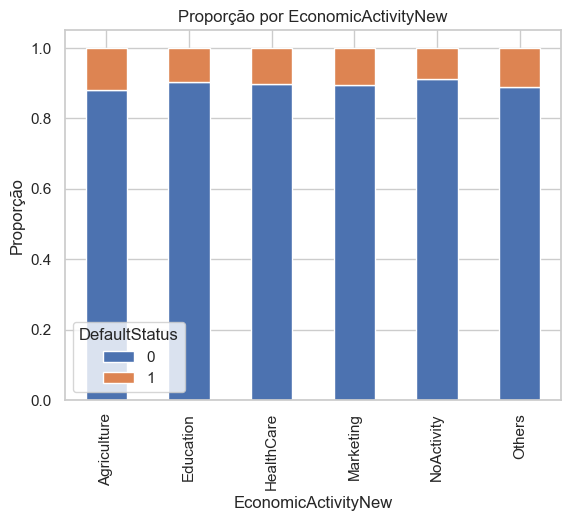

p-valor do teste Qui^2: 0.8243006698465736
Sem Relação significativa encontrada entre EconomicActivityNew e DefaultStatus (p >= 0.05).

Análise do atributo categórico: CityNew
------------------------------------------------------------
Proporcão de DefaultStatus por CityNew:
DefaultStatus         0         1
CityNew                          
Night City     0.809227  0.190773
NoCity         0.908333  0.091667
Smallville     0.941035  0.058965
Springfield    0.930233  0.069767


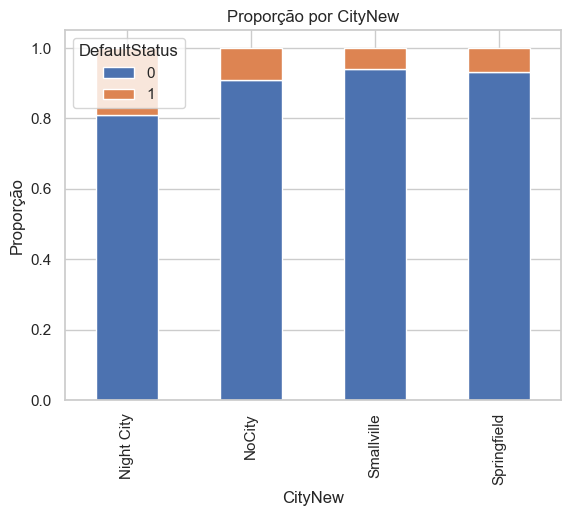

p-valor do teste Qui^2: 1.064546393903981e-19
Relação significativa encontrada entre CityNew e DefaultStatus (p < 0.05).

Análise do atributo categórico: MonthApplication
------------------------------------------------------------
Proporcão de DefaultStatus por MonthApplication:
DefaultStatus            0         1
MonthApplication                    
1                 0.879397  0.120603
2                 0.905405  0.094595
3                 0.915423  0.084577
4                 0.911628  0.088372
5                 0.888350  0.111650
6                 0.873786  0.126214
7                 0.897059  0.102941
8                 0.872807  0.127193
9                 0.866667  0.133333
10                0.906977  0.093023
11                0.895522  0.104478
12                0.921951  0.078049


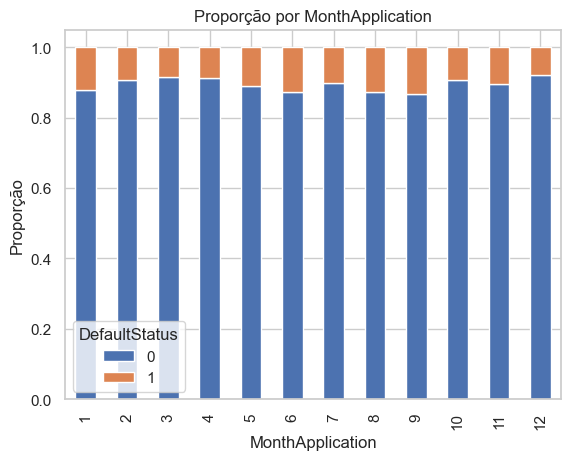

p-valor do teste Qui^2: 0.6806518716937594
Sem Relação significativa encontrada entre MonthApplication e DefaultStatus (p >= 0.05).

Análise do atributo categórico: WeekApplication
------------------------------------------------------------
Proporcão de DefaultStatus por WeekApplication:
DefaultStatus           0         1
WeekApplication                    
1                0.881757  0.118243
2                0.891003  0.108997
3                0.894097  0.105903
4                0.905429  0.094571
5                0.909524  0.090476


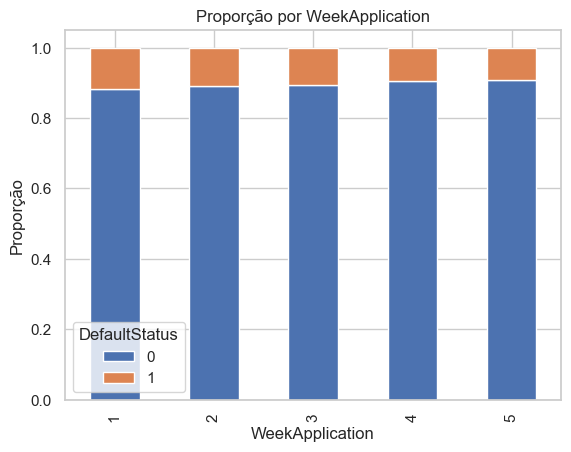

p-valor do teste Qui^2: 0.6778891747799952
Sem Relação significativa encontrada entre WeekApplication e DefaultStatus (p >= 0.05).

Análise do atributo categórico: MultipleApplications
------------------------------------------------------------
Proporcão de DefaultStatus por MultipleApplications:
DefaultStatus                0         1
MultipleApplications                    
0                     0.893805  0.106195
1                     0.926829  0.073171


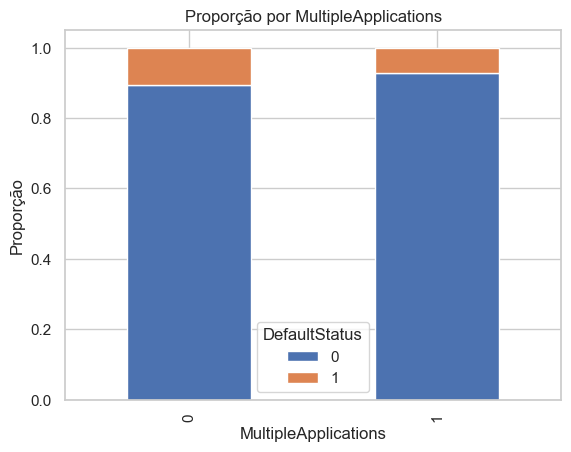

Aviso: Validade do teste Qui^2 questionável pois algumas frequências esperadas são menores que 5

Análise do atributo categórico: App_Hist
------------------------------------------------------------
Proporcão de DefaultStatus por App_Hist:
DefaultStatus         0         1
App_Hist                         
0              0.894380  0.105620
1              0.888889  0.111111


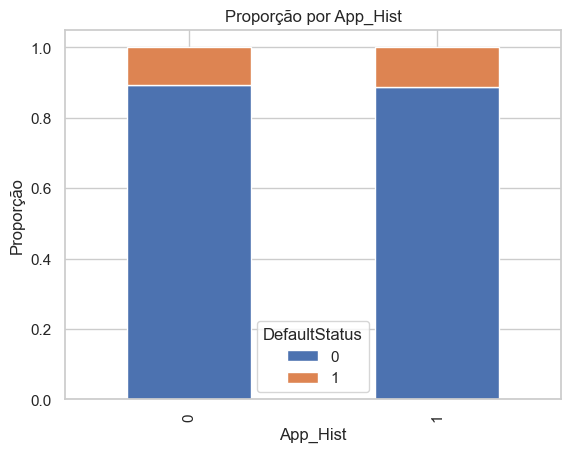

Aviso: Validade do teste Qui^2 questionável pois algumas frequências esperadas são menores que 5

Analisando o atributo numérico: CreditAmount
------------------------------------------------------------


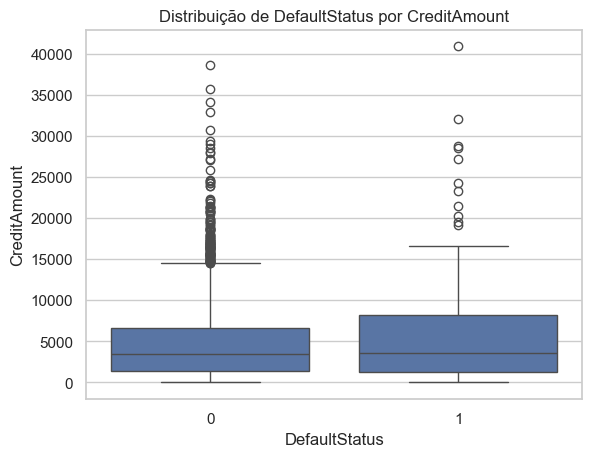

Média de CreditAmount Para DefaultStatus=0: 4905.956637168141
Média de CreditAmount Para DefaultStatus=1: 5532.438202247191
p-valor para o teste de normalidade quando DefaultStatus = 0: 2.6027781079371636e-202
p-valor para o teste de normalidade quando DefaultStatus = 1: 8.563729799305025e-32
Teste t não aplicável (normalidade não pode ser assumida)
p-valor do teste Mann-Whitney: 0.5054960045371728
Diferença não significativa entre as distribuições entre grupos de DefaultStatus para CreditAmount (p >= 0.05).

Analisando o atributo numérico: CreditScore
------------------------------------------------------------


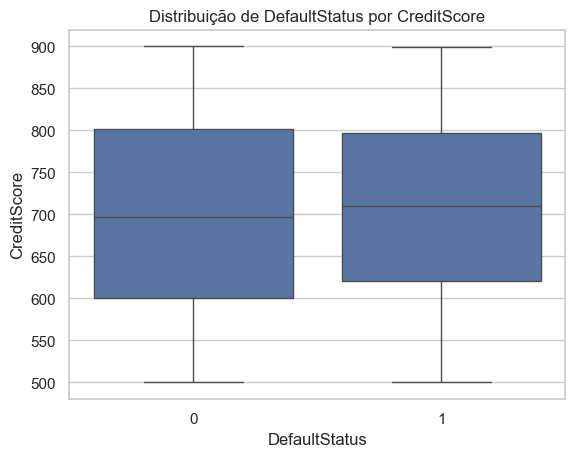

Média de CreditScore Para DefaultStatus=0: 700.2345132743363
Média de CreditScore Para DefaultStatus=1: 709.6217228464419
p-valor para o teste de normalidade quando DefaultStatus = 0: 0.0
p-valor para o teste de normalidade quando DefaultStatus = 1: 4.467427870475768e-16
Teste t não aplicável (normalidade não pode ser assumida)
p-valor do teste Mann-Whitney: 0.20376549151802148
Diferença não significativa entre as distribuições entre grupos de DefaultStatus para CreditScore (p >= 0.05).

Analisando o atributo numérico: IDValue_BRL
------------------------------------------------------------


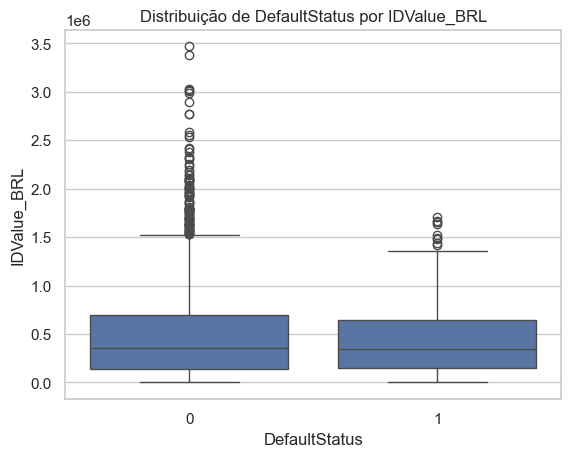

Média de IDValue_BRL Para DefaultStatus=0: 495281.4531835206
Média de IDValue_BRL Para DefaultStatus=1: 445603.74901960784
p-valor para o teste de normalidade quando DefaultStatus = 0: 1.427666560988952e-169
p-valor para o teste de normalidade quando DefaultStatus = 1: 1.658610571915414e-11
Teste t não aplicável (normalidade não pode ser assumida)
p-valor do teste Mann-Whitney: 0.720759880676778
Diferença não significativa entre as distribuições entre grupos de DefaultStatus para IDValue_BRL (p >= 0.05).

Analisando o atributo numérico: IDAge
------------------------------------------------------------


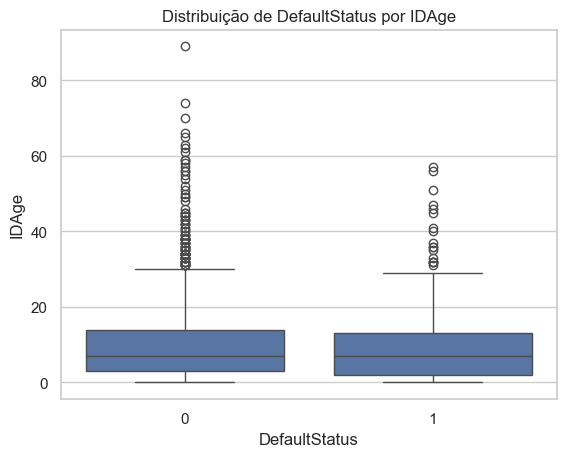

Média de IDAge Para DefaultStatus=0: 9.9382889200561
Média de IDAge Para DefaultStatus=1: 10.1
p-valor para o teste de normalidade quando DefaultStatus = 0: 4.3975001551659716e-221
p-valor para o teste de normalidade quando DefaultStatus = 1: 7.715843604371383e-23
Teste t não aplicável (normalidade não pode ser assumida)
p-valor do teste Mann-Whitney: 0.42189163385806683
Diferença não significativa entre as distribuições entre grupos de DefaultStatus para IDAge (p >= 0.05).

Analisando o atributo numérico: DefaultStatus
------------------------------------------------------------


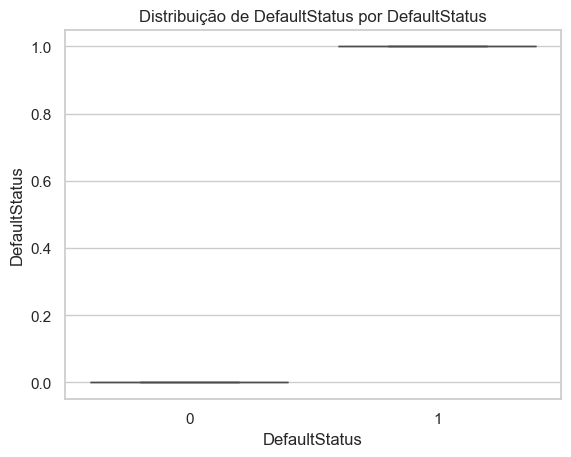

Média de DefaultStatus Para DefaultStatus=0: 0.0
Média de DefaultStatus Para DefaultStatus=1: 1.0
p-valor para o teste de normalidade quando DefaultStatus = 0: nan
p-valor para o teste de normalidade quando DefaultStatus = 1: nan
Teste t não aplicável (normalidade não pode ser assumida)
p-valor do teste Mann-Whitney: 0.0
Diferença entre as distribuições significativa entre grupos de DefaultStatus para DefaultStatus (p < 0.05).

Matriz de correlação entre as variáveis numéricas (considerando coeficiente de spearman):
------------------------------------------------------------


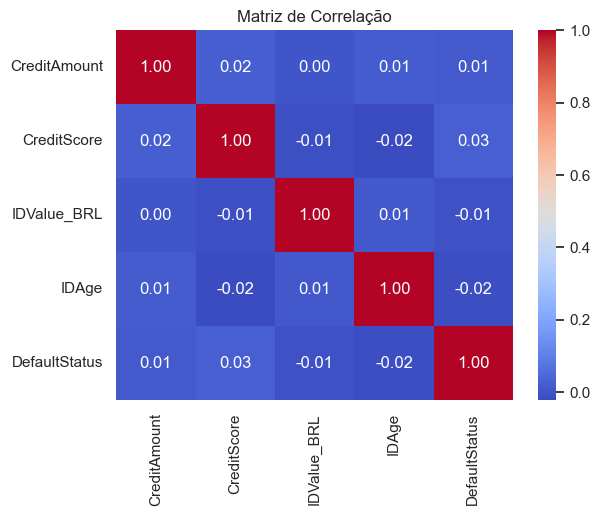

In [198]:
# Análise de Default para PJ
analise_automatica(df.loc[df["PersonType"]=="PJ"][['CreditAmount', 'PersonType', 'ProductType', 'EconomicActivityNew', 'CreditScore', 'IDValue_BRL', 'IDAge', 'CityNew', 'MonthApplication', 'WeekApplication', 'MultipleApplications', 'App_Hist', 'DefaultStatus']])

## Conclusões das três análises acima
Uma das conclusões mais importantes está presente na primeira parte da primeira análise (PF+PJ): Existe uma diferença significativa entre a frequência de clientes com DefaultStatus = 1 entre os agrupamentos PJ e PF, sendo evidente que clientes PF tem maiores frequências de clientes inadimplentes. Outros pontos que merecem destaque dos resultados nesta primeira análise: i) ProductType também se mostrou como uma variável significativa em relação à frequência de clientes com DefaultStatus = 1; ii) A atividade econômica, aqui, se mostrou significativa, mas será visto posteriormente que isso se deve ao impacto da separação do tipo de pessoa (clientes PF não tem atividade cadastrada); iii) A cidade se mostrou como uma variável significativa no agrupamento dos clientes com maiores tendências à inadimplência, com clientes da cidade Night City tendo a maior frequência de DefaultStatus = 1. As demais variáveis categóricas não apresentaram impactos/associações significativos; iv) Foram constatadas, conforme teste de mann-whitney, diferenças significativas entre os grupos para as variáveis IDAge e IDValue_BRL. Contudo, isso também pode estar associado ao impacto da separação por tipo de pessoa. Este é um dos grandes motivos para realizarmos a análise separado por tipo de pessoa: verificar se estes efeitos se mantém quando removemos os efeitos destes agrupamentos; v) Não foi detectada diferença significativa entre as distribuições do CreditScore entre os grupos de clientes com DefaultStatus = 1 e DefaultStatus = 0. Este fato pode representar que o Score não está detectando da melhor forma as tendências à inadimplência de um cliente. O mais correto seria existir sim diferença significativa e valores menores de Score associados a clientes com DefaultScore = 1. Obs: CreditAmount não apresentou correlação significativa.

Ao separarmos as análises de acordo com o tipo de pessoa (PF e PJ), é possível verificar que: i) O Tipo de Produtos se manteve como uma variável significativa; ii) EconomicActivity não pode mais ser considerado como uma variável significativa, tendo em vista principalmente que no caso de PJ não foi possível detectar correlações significativas das atividades com os grupos de DefaultStatus; iii) A Cidade se manteve como uma variável significativa. As demais variáveis categóricas se mantiveram como não significativas; iv) IDAge não aparece mais como significativa (tanto em PF quanto PJ), contudo IDValue_BRL se manteve significativa para PF apenas; v) CreditScore e CreditAmount se mantiveram como não significativas entre os grupos de DeafultStatus.

## Análise aprofundada do CreditScore: Relação com variáveis significativas
Em suma, as variáveis PersonType, ProductType, City e IDValue_BRL (caso PF) apresentaram diferenças/agrupamentos significativos quando são levados os agrupamentos proporcionados pelo DefaultStatus, ou seja, são variáveis (características) que contribuem na identificação de clientes potencialmente inadimplentes. Será feita, nas próximas células, uma análise de como o Score de Crédito se distribui em cada uma dessas variáveis. Seria interessante se o Score fosse influenciado de acordo com cada categoria/valor destas variáveis.

Contudo, como é possível ver nas células abaixo, o Score de Crédito não parece variar de acordo com as variáveis de forma significativa. Clientes PJ e PF possuem Scores semelhantes, os tipos diferentes de produtos possuem Scores semelhantes, assim como as cidades. Também, no caso de clientes PF, não há uma relação explícita entre o Score e o IDValue_BRL. Ou seja, provavelmente o Score não está captando as informações proporcionadas por estas variáveis, variáveis as quais, comprovadamente, possuem relação com a frequência de clientes inadimplentes.

In [205]:
score_analysis_person = df.groupby(df['PersonType']).agg(Max_Score=('CreditScore', np.max),
                                                                        Min_Score=('CreditScore', np.min),
                                                                        Mean_Score=('CreditScore', np.mean),
                                                                        Std_Score=('CreditScore', np.std),
                                                                        Median_Score=('CreditScore', np.median),
                                                                        Prop_Default=('DefaultStatus', np.mean)).reset_index()

score_analysis_person

,PersonType,Max_Score,Min_Score,Mean_Score,Std_Score,Median_Score,Prop_Default
0,PF,900,500,703.373712,116.478361,706.0,0.268232
1,PJ,900,500,701.226355,114.233465,699.0,0.105659


<Axes: xlabel='PersonType', ylabel='CreditScore'>

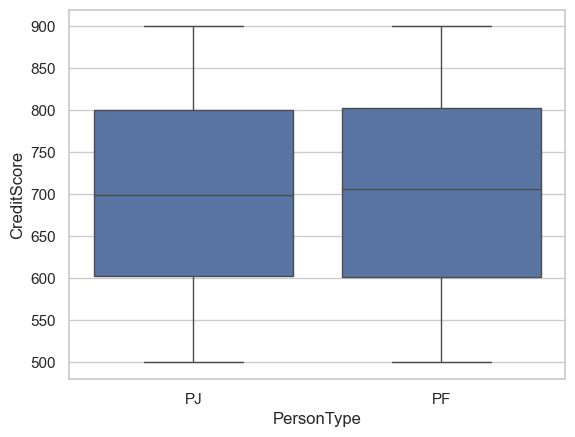

In [200]:
sns.boxplot(data=df, x='PersonType', y='CreditScore')

In [206]:
score_analysis_product = df.groupby(df['ProductType']).agg(Max_Score=('CreditScore', np.max),
                                                                        Min_Score=('CreditScore', np.min),
                                                                        Mean_Score=('CreditScore', np.mean),
                                                                        Std_Score=('CreditScore', np.std),
                                                                        Median_Score=('CreditScore', np.median),
                                                                        Prop_Default=('DefaultStatus', np.mean)).reset_index()

score_analysis_product

,ProductType,Max_Score,Min_Score,Mean_Score,Std_Score,Median_Score,Prop_Default
0,CartaoCredito,900,500,702.217913,114.803032,705.0,0.134746
1,Emprestimo,900,500,702.339992,115.892329,703.0,0.236853


<Axes: xlabel='ProductType', ylabel='CreditScore'>

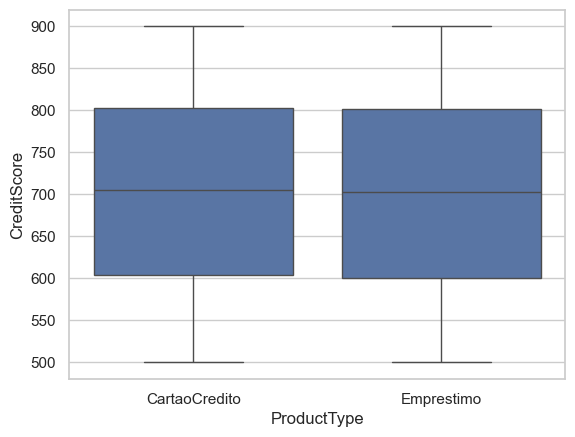

In [207]:
sns.boxplot(data=df, x='ProductType', y='CreditScore')

In [210]:
score_analysis_city = df.groupby(df['CityNew']).agg(Max_Score=('CreditScore', np.max),
                                                                        Min_Score=('CreditScore', np.min),
                                                                        Mean_Score=('CreditScore', np.mean),
                                                                        Std_Score=('CreditScore', np.std),
                                                                        Median_Score=('CreditScore', np.median),
                                                                        Prop_Default=('DefaultStatus', np.mean)).reset_index()

score_analysis_city

,CityNew,Max_Score,Min_Score,Mean_Score,Std_Score,Median_Score,Prop_Default
0,Night City,900,500,702.559848,115.791061,703.0,0.254592
1,NoCity,900,500,705.035857,122.021780,724.0,0.175299
2,Smallville,900,500,702.113368,114.462030,703.0,0.142857
3,Springfield,900,500,701.724656,114.727460,703.0,0.158949


<Axes: xlabel='CityNew', ylabel='CreditScore'>

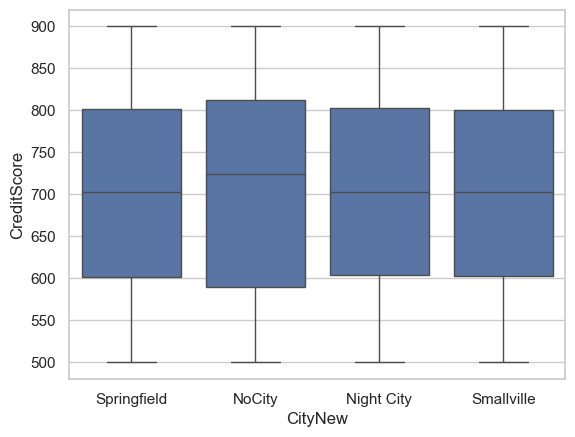

In [211]:
sns.boxplot(data=df, x='CityNew', y='CreditScore')

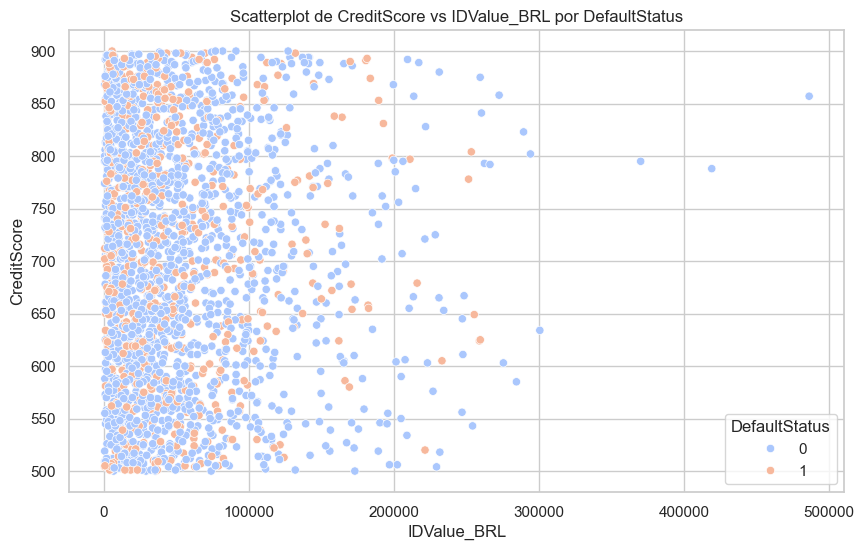

In [222]:
score_analysis_value = df.loc[(df["PersonType"]=="PF")]

sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=score_analysis_value, x='IDValue_BRL', y='CreditScore', hue='DefaultStatus', palette='coolwarm')

plt.title('Scatterplot de CreditScore vs IDValue_BRL por DefaultStatus')
plt.xlabel('IDValue_BRL')
plt.ylabel('CreditScore')

plt.show()

## Análise Adicional: ML e Explicabilidade
Uma análise interessante adicional que pode ser feita para apresentar os impactos das variáveis selecionadas até então é a apresentação da importância de cada atributo e como sua variação impacta no output DefaultStatus através da biblioteca SHAP.

A interpretação do gráfico abaixo nos leva a conclusões semelhantes às obtidas nas análises anteriores. O modelo escolhido (Decision Tree Classifier) apontou a variável IDValue_BRL como uma variável importante na classificação de DefaultStatus, em segundo lugar o fato de a pessoa ser PF e assim pr diante.

Pontos vermelhos apontam valores mais elevados da variável em questão, enquanto pontos mais à direita apontam maiores tendências em gerar maiores probabilidades de DefaultStatus = 1. Assim, é possível verificar, por exemplo, que de fato clientes PF possuem maiores tendências ao DefaultStatus = 1. Assim como o fato de a cidade do cliente ser Night City e o tipo de produto ser empréstimo, tudo de acordo com as análises estatísticas anteriores.

Nesse sentido, é possível fazer as seguintes conclusões com base nos dados fornecidos: As caracteríticas/variáveis Tipo de Pessoa (PF ou PJ), Tipo de Produto (Cartão de Crédito ou Empréstimo), Cidade do Cliente e Valor, em R$, associado ao cliente (Income para PF e Revenue para PJ) são atributos que fornecem qualidade informacional para classificar clientes conforme sua tendência a se tornar inadimplentes (ocorrer default). Nesse sentido, essas características são recomendadas de serem levadas em conta no processo de determinação do Score de Crédito com o objetivo de proporcionar valores de Score devidamente associados às tendências dos clientes de se tornarem inadimplentes. Com a consideração destas características, é possível atuar em cima dos quase 20% de clientes que têm solicitações aprovadas mas que possuem status de default positivo, ou seja, tendência de inadimplência, proporcionando valores de Score menores que os atuais e consequentemente negações das solicitações de forma mais efetiva.

In [17]:
df_post_study = df[['PersonType', 'ProductType', 'CityNew', 'IDValue_BRL', 'DefaultStatus']]

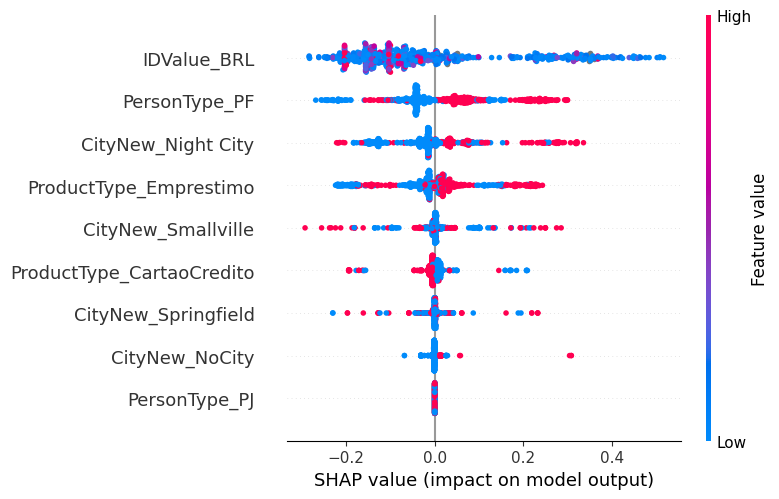

In [22]:
X = df_post_study.drop('DefaultStatus', axis=1)  
y = df_post_study['DefaultStatus'] 

categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
X = pd.get_dummies(X, columns=categorical_features) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=df_post_study["DefaultStatus"])

model = DecisionTreeClassifier(random_state=42)

model.fit(X_train, y_train)

explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[:, :, 1], X_test)